###**(1) 데이터 가져오기**

*   sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
*   diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


###**(2) 모델에 입력할 데이터 X, y 준비하기**
*   df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
*   df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
X = np.array(df_X)
y = np.array(df_y)

###**(3) train 데이터와 test 데이터로 분리하기**
*   X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


###**(4) 모델 준비하기**
*   입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
*   모델 함수를 구현해주세요.


In [4]:
W = np.random.rand(10)
b = np.random.rand()

def model(x, w, b):
  predictions = 0
  for i in range(10):
    predictions += x[:, i] * w[i]
  predictions += b

  return predictions

print(W, b)
print(model(X_train, W, b).shape)

[0.95316751 0.10861531 0.76228141 0.70072989 0.8002379  0.08269874
 0.74765603 0.56168819 0.73303253 0.75997892] 0.12864173160697534
(309,)


###**(5) 손실함수 loss 정의하기**
*   손실함수를 MSE 함수로 정의해주세요.

In [5]:
def MSE(predictions, y):
    mse = ((predictions - y) ** 2).mean()

    return mse

def loss(x, w, b, y):
  predictions = model(x, w, b)
  loss = MSE(predictions, y)

  return loss

print(loss(X_train, W, b, y_train))

29982.633877876364


###**(6) 기울기를 구하는 gradient 함수 구현하기**
*   기울기를 계산하는 gradient 함수를 구현해주세요.

In [6]:
def gradient(X, W, b, y):
  N = len(y)
  y_pred = model(X, W, b)

  dW = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()

  return dW, db

dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.74126173 -0.30271013 -5.59316709 -4.31638122 -1.93708934 -1.38931346
  2.91492978 -3.32746345 -4.70207221 -3.64586976]
db: -307.8544469053209


###**(7) 하이퍼 파라미터인 학습률 설정하기**
*   학습률, learning rate 를 설정해주세요
*   만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [7]:
def fit(x, w, b, y, epoch):
  LEARNING_RATE = 0.1
  losses = list()
  losses = []

  for epoch in range(epoch):
    dW, db = gradient(x, w, b, y)
    w -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x, W, b, y)
    losses.append(L)
    if epoch % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (epoch, L))

  return w, b, losses

###**(8) 모델 학습하기**
*   정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
*   loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
*   입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [8]:
W, b, losses = fit(X_train, W, b, y_train, 1001)

Iteration 0 : Loss 21441.8566
Iteration 10 : Loss 6362.5183
Iteration 20 : Loss 6105.6158
Iteration 30 : Loss 6022.2367
Iteration 40 : Loss 5943.4209
Iteration 50 : Loss 5867.1318
Iteration 60 : Loss 5793.2602
Iteration 70 : Loss 5721.7221
Iteration 80 : Loss 5652.4370
Iteration 90 : Loss 5585.3270
Iteration 100 : Loss 5520.3171
Iteration 110 : Loss 5457.3349
Iteration 120 : Loss 5396.3106
Iteration 130 : Loss 5337.1770
Iteration 140 : Loss 5279.8691
Iteration 150 : Loss 5224.3243
Iteration 160 : Loss 5170.4823
Iteration 170 : Loss 5118.2848
Iteration 180 : Loss 5067.6756
Iteration 190 : Loss 5018.6006
Iteration 200 : Loss 4971.0075
Iteration 210 : Loss 4924.8458
Iteration 220 : Loss 4880.0670
Iteration 230 : Loss 4836.6242
Iteration 240 : Loss 4794.4720
Iteration 250 : Loss 4753.5670
Iteration 260 : Loss 4713.8669
Iteration 270 : Loss 4675.3312
Iteration 280 : Loss 4637.9207
Iteration 290 : Loss 4601.5976
Iteration 300 : Loss 4566.3254
Iteration 310 : Loss 4532.0689
Iteration 320 : Lo

###**(9) test 데이터에 대한 성능 확인하기**
*   test 데이터에 대한 성능을 확인해주세요.

In [9]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

print(mse)

3066.485874747208


###**(10) 정답 데이터와 예측한 데이터 시각화하기**
*   x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

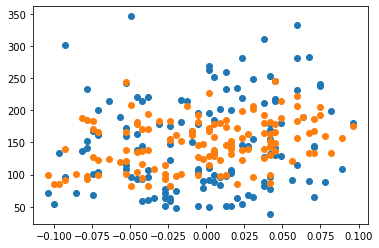

In [10]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()